
<a id='lqramsey'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Taxação Ótima em uma Economia LQ


<a id='index-1'></a>

## Contents

- [Taxação Ótima em uma Economia LQ](#Taxação-Ótima-em-uma-Economia-LQ)  
  - [Resumo](#Resumo)  
  - [O Problema de Ramsey](#O-Problema-de-Ramsey)  
  - [Implementação](#Implementação)  
  - [Exemplos](#Exemplos)  
  - [Exercícios](#Exercícios)  
  - [Soluções](#Soluções)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Nesta palestra, estudamos a política fiscal ideal em um ambiente linear quadrático.

Modificamos levemente um modelo bem conhecido de Robert Lucas e Nancy Stokey [LS83](https://julia.quantecon.org/../zreferences.html#lucasstokey1983) para que fórmulas convenientes para
a resolução de modelos linear-quadráticos pode ser aplicada para simplificar os cálculos.

A economia consiste em uma família representativa e um governo benevolente.

O governo financia um fluxo exógeno das próprias compras com empréstimos contingentes do estado e um imposto linear sobre a renda do trabalho.

Um imposto linear às vezes é chamado de imposto fixo.

A família maximiza a utilidade escolhendo caminhos para consumo e mão-de-obra, considerando os preços e a taxa de impostos do governo e os planos de empréstimos, conforme determinado.

A utilidade máxima atingível para a família depende dos planos de impostos e empréstimos do governo.

O problema de *Ramsey* [Ram27](https://julia.quantecon.org/../zreferences.html#ramsey1927) é escolher planos de impostos e empréstimos que maximizem o bem-estar da família, adotando o comportamento otimizador da família, conforme determinado .

Há um grande número de equilíbrios competitivos indexados por diferentes políticas fiscais do governo.

O planejador de Ramsey escolhe o melhor equilíbrio competitivo.

Queremos estudar a dinâmica das alíquotas, receitas tributárias e dívidas do governo sob um plano de Ramsey.

Como o modelo de Lucas e Stokey apresenta dívida governamental contingente do estado, a dinâmica da dívida governamental difere substancialmente da do modelo de Robert Barro [Bar79](https://julia.quantecon.org/../zreferences.html#barro1979).

O tratamento dado aqui segue de perto <a href=/_static/pdfs/firenze.pdf download> este manuscrito </a>, preparado
por Thomas J. Sargent e Francois R. Velde.

Abordamos apenas os principais recursos do problema nesta palestra, deixando você consultar essa fonte para obter resultados e intuição adicionais.

### Características do modelo

- Modelo linear quadrático (LQ);
- Família representativa;
- Programação dinâmica estocástica em um horizonte infinito, e
- Tributação distorcida.  

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

## O Problema de Ramsey

Começamos descrevendo as principais premissas em relação à tecnologia, famílias e setor governamental.

### Tecnologia

A mão-de-obra pode ser convertida individualmente em um único bem de consumo não armazenável.

No espírito usual do modelo LQ, a quantidade de trabalho fornecida em cada período é irrestrita.

Isso é irreal, mas útil quando se trata de resolver o modelo.

A oferta realista de mão-de-obra pode ser induzida por valores de parâmetros adequados.

### Famílias

Considere uma família representativa que escolhe um caminho $ \{\ell_t, c_t \} $
para trabalho e consumo para maximizar


<a id='equation-lq-hu'></a>
$$
-\mathbb E \frac{1}{2} \sum_{t=0}^{\infty} \beta^t
\left[
   (c_t - b_t)^2 + \ell_t^2
\right] \tag{1}
$$

sujeito à restrição orçamentária


<a id='equation-lq-hc'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t p^0_t
\left[
    d_t + (1 - \tau_t) \ell_t + s_t - c_t
\right] = 0 \tag{2}
$$

Aqui

- $ \beta $ é um fator de desconto em $ (0, 1) $
- $ p_t ^ 0 $ é um preço escalado de Arrow-Debreu no momento $ 0 $ de bens contingentes do histórico no momento $ t + j $
- $ b_t $ é um parâmetro de preferência estocástico
- $ d_t $ é um processo de doação
- $ \tau_t $ é uma taxa de imposto fixa sobre a renda do trabalho
- $ s_t $ é um pagamento prometido no prazo - $ t $ em dívida emitida pelo governo  


O preço escalado de Arrow-Debreu $ p ^ 0_t $ está relacionado ao preço não escalado de Arrow-Debreu da seguinte forma.

Se deixarmos $ \pi ^ 0_t (x ^ t) $
denotar a probabilidade (densidade) de um histórico $ x ^ t = [x_t, x_ {t-1}, \ldots, x_0] $ do estado $ x ^ t $ e, em seguida,
o Arrow-Debreu cronometra o preço de $ 0 $ de uma reivindicação em uma unidade de consumo na data $ t $, o histórico $ x ^ t $ seria

$$
\frac{\beta^t p^0_t} {\pi_t^0(x^t)}
$$

Assim, nosso preço escalado de Arrow-Debreu é o preço normal de Arrow-Debreu multiplicado pelo fator de desconto $ \beta ^ t $ e dividido
por uma probabilidade apropriada.

A restrição orçamentária [(2)](#equation-lq-hc) exige que o valor presente do consumo seja restrito para ser igual ao valor presente de dotações, renda do trabalho e pagamentos de cupons em títulos.

### Governo

O governo impõe um imposto linear sobre a renda do trabalho, comprometendo-se totalmente com um caminho estocástico de alíquotas no tempo zero.

O governo também emite dívidas contingentes do estado.

Dados os planos de impostos e empréstimos do governo, podemos construir um equilíbrio competitivo com os impostos governamentais distorcidos.

Entre todos esses equilíbrios competitivos, o plano de Ramsey é aquele que maximiza o bem-estar do consumidor representativo.

### Variáveis exógenas

Doações, gastos do governo, o processo de choque de preferências $ b_t $ e
Os pagamentos prometidos de cupom da dívida inicial do governo $ s_t $ são todos exógenos e dados por

- $ d_t = S_d x_t $  
- $ g_t = S_g x_t $  
- $ b_t = S_b x_t $  
- $ s_t = S_s x_t $  


As matrizes $ S_d, S_g, S_b, S_s $ são primitivas e $ \{x_t \} $ são
um processo estocástico exógeno assumindo valores em $ \mathbb R ^ k $.

Consideramos duas especificações para $ \{x_t \} $.


<a id='lq-twospec'></a>
1. Caso discreto: $ \{x_t \} $ é uma cadeia de Markov de estado discreto com matriz de transição $ P $.
2. Caso VAR: $ \{x_t \} $ obedece a $ x_ {t + 1} = A x_t + C w_ {t + 1} $ em que $ \{w_t \} $ é um gaussiano médio nulo independente com matriz de covariância de identificação.  

### Factibilidade

A restrição de viabilidade de período a período para esta economia é


<a id='equation-lq-feasible'></a>
$$
c_t + g_t = d_t + \ell_t \tag{3}
$$

Um processo de consumo de mão-de-obra $ \{\ell_t, c_t \} $ é chamado *viável* se [(3)](#equation-lq-feasible) valer para todos os $ t $.

### Restrição orçamentária do governo

Onde $ p_t ^ 0 $ é novamente um preço Arrow-Debreu em escala, o tempo zero de restrição orçamentária do governo é


<a id='equation-lq-gc'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t p^0_t
(s_t + g_t - \tau_t \ell_t ) = 0 \tag{4}
$$

### Equilíbrio

Um *equilíbrio* é uma alocação viável $ \{\ell_t, c_t \} $, uma sequência
de preços $ \{p_t ^ 0 \} $ e um sistema tributário $ \{\tau_t \} $ que

1. A alocação $ \{\ell_t, c_t \} $ é ideal para a família, dada $ \{p_t ^ 0 \} $ e $ \{\tau_t \} $.
2. A restrição orçamentária do governo [(4)](#equation-lq-gc) é atendida.


O *problema de Ramsey* é escolher o equilíbrio $ \{\ell_t, c_t, \tau_t, p_t ^ 0 \} $ que maximize o
bem-estar da família.

Se $ \{\ell_t, c_t, \tau_t, p_t ^ 0 \} $ resolver o problema de Ramsey,
então $ \{\tau_t \} $ é chamado de *plano de Ramsey*.

O procedimento de solução que adotamos é

1. Use as condições de primeira ordem do problema doméstico para definir
  preços e alocações fornecidos $ \{\tau_t \} $;
2. Use essas expressões para reescrever a restrição orçamentária do governo
  [(4)](#equation-lq-gc) em termos de variáveis e alocações exógenas, e
3. Maximize a função objetivo da família [(1)](#equation-lq-hu) sujeita à
  restrição construída na etapa 2 e a restrição de viabilidade
  [(3)](#equatiaon-lq-feasible).


A solução para esse problema de maximização fixa todas as quantidades de interesse.

### Solução

O primeiro passo é obter as primeiras condições para o problema da família,
tomando impostos e preços conforme determinado.

Permitindo que $ \mu $ seja o multiplicador de Lagrange em [(2)](#equation-lq-hc), a primeira ordem
as condições são $ p_t ^ 0 = (c_t - b_t) / \mu $ e $ \ell_t = (c_t - b_t)
(1 - \tau_t) $.

Reorganizando e normalizando em $ \mu = b_0 - c_0 $, podemos escrever estes
condições como


<a id='equation-lq-hfoc'></a>
$$
p_t^0 = \frac{b_t - c_t}{b_0 - c_0}
\quad \text{and} \quad
\tau_t = 1 - \frac{\ell_t}{b_t - c_t} \tag{5}
$$

Substituindo [(5)](#equation-lq-hfoc) na restrição orçamentária do governo [(4)](#equation-lq-gc), temos


<a id='equation-lq-gc2'></a>
$$
\mathbb E \sum_{t=0}^{\infty} \beta^t
\left[ (b_t - c_t)(s_t + g_t - \ell_t) + \ell_t^2 \right] = 0 \tag{6}
$$

O problema de Ramsey agora equivale a maximizar [(1)](#equation-lq-hu) sujeito a
[(6)](#equation-lq-gc2) e [(3)](#equation-lq-viável).

O Lagrangiano associado é


<a id='equation-lq-rp'></a>
$$
\mathscr L =
\mathbb E  \sum_{t=0}^{\infty} \beta^t
\left\{
-\frac{1}{2} \left[ (c_t - b_t)^2 + \ell_t^2 \right] +
\lambda
\left[ (b_t - c_t)(\ell_t - s_t - g_t) - \ell_t^2 \right] +
\mu_t
[d_t + \ell_t - c_t - g_t]
\right\} \tag{7}
$$

As condições de primeira ordem associadas a $ c_t $ e $ \ell_t $ são

$$
-(c_t - b_t ) + \lambda [- \ell_t + (g_t + s_t )] = \mu_t
$$

e

$$
\ell_t - \lambda [(b_t - c_t) - 2 \ell_t ] = \mu_t
$$

Combinando essas duas últimas igualdades com [(3)](#equação-lq-viável) e trabalhando
através da álgebra, pode-se mostrar que


<a id='equation-lq-lcex'></a>
$$
\ell_t = \bar \ell_t - \nu m_t
\quad \text{and} \quad
c_t = \bar c_t - \nu m_t \tag{8}
$$

onde

- $ \nu := \lambda / (1 + 2 \lambda) $  
- $ \bar \ell_t := (b_t - d_t + g_t) / 2 $  
- $ \bar c_t := (b_t + d_t - g_t) / 2 $  
- $ m_t := (b_t - d_t - s_t ) / 2 $  


Além de $ \nu $, todas essas quantidades são expressas em termos de variáveis exógenas.

Para resolver $ \nu $, podemos usar a restrição orçamentária do governo novamente.

O termo entre colchetes em [(6)](#equation-lq-gc2) é $ (b_t - c_t) (s_t + g_t) - (b_t - c_t) \ell_t + \ell_t ^ 2 $.

Usando [(8)](#equation-lq-lcex), as definições acima e o fato de que $ \bar \ell
= b - \bar c $, este termo pode ser reescrito como

$$
(b_t - \bar c_t) (g_t + s_t ) + 2 m_t^2 ( \nu^2 - \nu)
$$

Reinserindo em [(6)](#equation-lq-gc2), obtemos


<a id='equation-lq-gc22'></a>
$$
\mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t
(b_t - \bar c_t) (g_t + s_t )
\right\}
+
( \nu^2 - \nu) \mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t 2 m_t^2
\right\}
= 0 \tag{9}
$$

Embora ainda não esteja claro, estamos quase lá porque:

- Os dois termos das expectativas em [(9)](#equation-lq-gc22) podem ser resolvidos em termos de primitivas do modelo.
- Isso, por sua vez, nos permite resolver o multiplicador Lagrange $ \nu $.
- Com $ \nu $ em mãos, podemos voltar e resolver as alocações via [(8)](#equation-lq-lcex).
- Assim que tivermos as alocações, os preços e o sistema tributário poderão ser derivados de
   [(5)](#equation-lq-hfoc).  

### Computando o termo quadrático

Vamos considerar como obter o termo $ \nu $ em [(9)](#equation-lq-gc22).

Se pudermos calcular as duas somas geométricas esperadas


<a id='equation-lq-gc3'></a>
$$
b_0 := \mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t
(b_t - \bar c_t) (g_t + s_t )
\right\}
\quad \text{and} \quad
a_0 := \mathbb E
\left\{
\sum_{t=0}^{\infty} \beta^t 2 m_t^2
\right\} \tag{10}
$$

então o problema se reduz a resolver

$$
b_0 + a_0 (\nu^2 - \nu) = 0
$$

for $ \nu $.

Desde que $ 4 b_0 <a_0 $, exista uma solução única $ \nu \in
(0, 1/2) $ e um $ \lambda> 0 $ correspondente correspondente.

Vamos descobrir como calcular expectativas matemáticas em [(10)](#equation-lq-gc3).

Para o primeiro, a variável aleatória $ (b_t - \bar c_t) (g_t + s_t) $ dentro da soma pode ser expressa como

$$
\frac{1}{2} x_t' (S_b - S_d + S_g)' (S_g + S_s) x_t
$$

Para a segunda expectativa em [(10)](#equation-lq-gc3), a variável aleatória $ 2 m_t ^ 2 $ pode ser escrita como

$$
\frac{1}{2} x_t' (S_b - S_d - S_s)' (S_b - S_d - S_s) x_t
$$

Daqui resulta que ambos os objetos de interesse são casos especiais da expressão


<a id='equation-lq-eqs'></a>
$$
q(x_0) = \mathbb E \sum_{t=0}^{\infty} \beta^t x_t' H x_t \tag{11}
$$

onde $ H $ é uma matriz conforme $ x_t $ e $ x_t '$ é a transposição do vetor da coluna $ x_t $.

Suponha primeiro que $ \{x_t \} $ seja o VAR Gaussiano descrito [acima](#lq-twospec).

Nesse caso, a fórmula para calcular $ q (x_0) $ é conhecida como $ q (x_0) = x_0 'Q x_0 + v $, em que

- $ Q $ é a solução para $ Q = H + \beta A 'Q A $, e
- $ v = \text {trace} \, (C 'Q C) \beta / (1 - \beta) $


A primeira equação é conhecida como equação de Lyapunov discreta e pode ser resolvida
usando [esta função](https://github.com/QuantEcon/QuantEcon.jl/blob/master/src/matrix_eqn.jl#L6).

### Caso de Markov em estado finito

A seguir, suponha que $ \ {x_t \} $ seja o processo discreto de Markov descrito [acima](#lq-twospec).

Suponha ainda que cada $ x_t $ receba valores no espaço de estados $ \{x ^ 1, \ldots, x ^ N \} \subset \mathbb R ^ k $.

Seja $ h \colon \mathbb R ^ k \ to \mathbb R $ uma determinada função e suponha que
deseja avaliar

$$
q(x_0) = \mathbb E \sum_{t=0}^{\infty} \beta^t h(x_t)
\quad \text{given} \quad x_0 = x^j
$$

Por exemplo, na discussão acima, $ h (x_t) = x_t 'H x_t $.

É legítimo passar a expectativa pela soma, levando a


<a id='equation-lq-ise'></a>
$$
q(x_0) = \sum_{t=0}^{\infty} \beta^t (P^t h)[j] \tag{12}
$$

Aqui

- $ P ^ t $ é o poder de $ t $ -ésima da matriz de transição $ P $
- $ h $ é, com algum abuso de notação, o vetor $ (h (x ^ 1), \ldots, h (x ^ N)) $
- $ (P ^ t h) [j] $ indica o elemento $ j $ -th de $ P ^ t h $


Pode-se mostrar que [(12)](#equation-lq-ise) é de fato igual ao elemento $ j $ -th de
o vetor $ (I - \beta P) ^ {- 1} h $.

Este último fato é aplicado nos cálculos abaixo.

### Outras variáveis

Estamos interessados em rastrear várias outras variáveis além daquelas
descritas acima.

Para preparar o caminho para isso, definimos

$$
p^t_{t+j} = \frac{b_{t+j}- c_{t+j}}{b_t - c_t}
$$

como o escalar Arrow-Debreu calcula o preço de $ t $ de uma reivindicação contingente histórica em uma unidade de consumo no momento $ t + j $.

Estes são os preços que prevaleceriam no momento $ t $ se o mercado fosse reaberto no momento $ t $.

Esses preços são constituintes do valor presente das obrigações do governo pendentes no momento $ t $, que podem ser expressas como


<a id='equation-lq-cb'></a>
$$
B_t :=
\mathbb E_t \sum_{j=0}^{\infty} \beta^j p^t_{t+j}
(\tau_{t+j} \ell_{t+j} - g_{t+j}) \tag{13}
$$

Usando nossa expressão para preços e o plano de Ramsey, também podemos escrever
$ B_t $ como

$$
B_t =
\mathbb E_t \sum_{j=0}^{\infty} \beta^j
\frac{ (b_{t+j} - c_{t+j})(\ell_{t+j} - g_{t+j}) - \ell^2_{t+j} }
{ b_t - c_t }
$$

Esta versão é mais conveniente para computação.

Usando a equação

$$
p^t_{t+j} = p^t_{t+1} p^{t+1}_{t+j}
$$

é possível verificar que [(13)](#equation-lq-cb) implica que

$$
B_t = (\tau_t \ell_t - g_t) + E_t \sum_{j=1}^\infty p^t_{t+j} (\tau_{t+j} \ell_{t+j} - g_{t+j})
$$

e


<a id='equation-lq-cb22'></a>
$$
B_t =   (\tau_t \ell_t - g_t) + \beta E_t p^t_{t+1} B_{t+1} \tag{14}
$$

Defina


<a id='equation-lq-rfr'></a>
$$
R^{-1}_{t} := \mathbb E_t \beta^j p^t_{t+1} \tag{15}
$$

$ R_ {t} $ é a taxa bruta sem risco de US 1 para empréstimos
entre $ t $ e $ t + 1 $.

### Um Martingale

Agora queremos estudar os dois objetos a seguir, a saber,

$$
\pi_{t+1} := B_{t+1} - R_t [B_t - (\tau_t \ell_t - g_t)]
$$

e a acumulação de $ \pi_t $

$$
\Pi_t := \sum_{s=0}^t \pi_t
$$

O termo $ \pi_ {t + 1} $ é a diferença entre duas quantidades:

> - $ B_ {t + 1} $, o valor da dívida do governo no início do período $ t + 1 $.
- $ R_t [B_t + g_t - \tau_t] $, que é o que o governo deveria no início de
   período $ t + 1 $ se tivesse simplesmente tomado emprestado à taxa livre de risco de um período em vez de vender títulos contingentes do estado.



Portanto, $ \pi_ {t + 1} $ é o pagamento excedente da carteira real de dívida pública contingente do estado em relação a uma alternativa
carteira suficiente para financiar $ B_t + g_t - \tau_t \ell_t $ e consistindo inteiramente de títulos de um período sem risco.

Use as expressões [(14)](#equation-lq-cb22) e [(15)](#equation-lq-rfr) para obter

$$
\pi_{t+1} = B_{t+1} - \frac{1}{\beta E_t p^t_{t+1}} \left[\beta E_t p^t_{t+1} B_{t+1} \right]
$$

ou


<a id='equation-lq-pidist'></a>
$$
\pi_{t+1} = B_{t+1} - \tilde E_t B_{t+1} \tag{16}
$$

onde $ \tilde E_t $ é a expectativa matemática condicional tomada em relação a uma densidade de transição em uma etapa
formado pela multiplicação da densidade de transição original pela razão de verossimilhança

$$
m^t_{t+1} = \frac{p^t_{t+1}}{E_t p^t_{t+1}}
$$

Segue-se da equação [(16)](#equation-lq-pidist) que

$$
\tilde E_t \pi_{t+1} = \tilde E_t B_{t+1} - \tilde E_t B_{t+1} = 0
$$

que afirma que $ \{\pi_ {t + 1} \} $ é uma sequência de diferenças de martingale sob a medida de probabilidade distorcida, e
que $ \{\Pi_t \} $ é um martingale sob a medida de probabilidade distorcida.

No modelo de redução de impostos de Robert Barro [Bar79](https://julia.quantecon.org/../zreferences.html#barro1979), a dívida do governo é uma caminhada aleatória.

No modelo atual, a dívida do governo $ \{B_t \} $ não é uma caminhada aleatória, mas o `excesso de pagamento '$ \{\pi_t \} $ nela.

## Implementação

O código a seguir fornece funções para

1. Resolução do plano de Ramsey, dada uma especificação da economia.
2. Simulação da dinâmica das principais variáveis.


Descrição e esclarecimentos são fornecidos abaixo

In [3]:
using QuantEcon, Plots, LinearAlgebra, Parameters

abstract type AbstractStochProcess end

struct ContStochProcess{TF <: AbstractFloat} <: AbstractStochProcess
    A::Matrix{TF}
    C::Matrix{TF}
end


struct DiscreteStochProcess{TF <: AbstractFloat} <: AbstractStochProcess
    P::Matrix{TF}
    x_vals::Matrix{TF}
end

struct Economy{TF <: AbstractFloat, SP <: AbstractStochProcess}
    β::TF
    Sg::Matrix{TF}
    Sd::Matrix{TF}
    Sb::Matrix{TF}
    Ss::Matrix{TF}
    proc::SP
end

function compute_exog_sequences(econ, x)
    # computar as sequências de variáveis exógenas
    Sg, Sd, Sb, Ss = econ.Sg, econ.Sd, econ.Sb, econ.Ss
    g, d, b, s = [dropdims(S * x, dims = 1) for S in (Sg, Sd, Sb, Ss)]

    #= resolver o multiplicador Lagrange na restrição de orçamento do governo
     De fato, resolvemos para ν = λ / (1 + 2 * λ). Aqui v é o
     solução para uma equação quadrática a (ν ^ 2 - ν) + b = 0 onde
     a e b são esperadas somas descontadas de formas quadráticas do estado. = #
    Sm = Sb - Sd - Ss

    return g, d, b, s, Sm
end


function compute_allocation(econ, Sm, ν, x, b)
    Sg, Sd, Sb, Ss = econ.Sg, econ.Sd, econ.Sb, econ.Ss

    # resolver para a alocação dados ν e x
    Sc = 0.5 .* (Sb + Sd - Sg - ν .* Sm)
    Sl = 0.5 .* (Sb - Sd + Sg - ν .* Sm)
    c = dropdims(Sc * x, dims = 1)
    l = dropdims(Sl * x, dims = 1)
    p = dropdims((Sb - Sc) * x, dims = 1)  # Price without normalization
    τ = 1 .- l ./ (b .- c)
    rvn = l .* τ

    return Sc, Sl, c, l, p, τ, rvn
end


function compute_ν(a0, b0)
    disc = a0^2 - 4a0 * b0

    if disc ≥ 0
        ν = 0.5 *(a0 - sqrt(disc)) / a0
    else
        println("There is no Ramsey equilibrium for these parameters.")
        error("Government spending (economy.g) too low")
    end

    # Teste para saber se o lagrangeano tem o sinal certo
    if ν * (0.5 - ν) < 0
        print("Multiplicador negativo na restrição orçamentária do governo.")
        error("Gastos do governo (economy.g) muito baixos")
    end

    return ν
end


function compute_Π(B, R, rvn, g, ξ)
    π = B[2:end] - R[1:end-1] .* B[1:end-1] - rvn[1:end-1] + g[1:end-1]
    Π = cumsum(π .* ξ)
    return π, Π
end


function compute_paths(econ::Economy{<:AbstractFloat, <:DiscreteStochProcess}, T)
    # notação simplificada
    @unpack β, Sg, Sd, Sb, Ss = econ
    @unpack P, x_vals = econ.proc

    mc = MarkovChain(P)
    state = simulate(mc, T, init=1)
    x = x_vals[:, state]

    # Computar a sequência exógena
    g, d, b, s, Sm = compute_exog_sequences(econ, x)

    # computar a0, b0
    ns = size(P, 1)
    F = I - β.*P
    a0 = (F \ ((Sm * x_vals)'.^2))[1] ./ 2
    H = ((Sb - Sd + Sg) * x_vals) .* ((Sg - Ss)*x_vals)
    b0 = (F \ H')[1] ./ 2

    # computar o multiplicador de Lagrange
    ν = compute_ν(a0, b0)

    # Resolva a alocação dada ν e x
    Sc, Sl, c, l, p, τ, rvn = compute_allocation(econ, Sm, ν, x, b)

    # computar variáveis remanescentes
    H = ((Sb - Sc) * x_vals) .* ((Sl - Sg) * x_vals) - (Sl * x_vals).^2
    temp = dropdims(F * H', dims = 2)
    B = temp[state] ./ p
    H = dropdims(P[state, :] * ((Sb - Sc) * x_vals)', dims = 2)
    R = p ./ (β .* H)
    temp = dropdims(P[state, :] *((Sb - Sc) * x_vals)', dims = 2)
    ξ = p[2:end] ./ temp[1:end-1]

    # computar π
    π, Π = compute_Π(B, R, rvn, g, ξ)

    return (g = g, d = d, b = b, s = s, c = c,
            l = l, p = p, τ = τ, rvn = rvn, B = B,
            R = R, π = π, Π = Π, ξ = ξ)
end

function compute_paths(econ::Economy{<:AbstractFloat, <:ContStochProcess}, T)
    # notação simplificada
    @unpack β, Sg, Sd, Sb, Ss = econ
    @unpack A, C = econ.proc

    # gerar uma condição inicial x0 satisfazendo x0 = A x0
    nx, nx = size(A)
    x0 = nullspace(I - A)
    x0 = x0[end] < 0 ? -x0 : x0
    x0 = x0 ./ x0[end]
    x0 = dropdims(x0, dims = 2)

    # gerar uma série temporal x de comprimento T a partir de x0
    nx, nw = size(C)
    x = zeros(nx, T)
    w = randn(nw, T)
    x[:, 1] = x0
    for t in 2:T
        x[:, t] = A *x[:, t-1] + C * w[:, t]
    end

    # computar sequência exógena
    g, d, b, s, Sm = compute_exog_sequences(econ, x)

    # computar a0 e b0
    H = Sm'Sm
    a0 = 0.5 * var_quadratic_sum(A, C, H, β, x0)
    H = (Sb - Sd + Sg)'*(Sg + Ss)
    b0 = 0.5 * var_quadratic_sum(A, C, H, β, x0)

    # computar multiplicador de Lagrange
    ν = compute_ν(a0, b0)

    # resolver para a alocação dados v e x
    Sc, Sl, c, l, p, τ, rvn = compute_allocation(econ, Sm, ν, x, b)

    # computar as variáveis remanescentes
    H = Sl'Sl - (Sb - Sc)' *(Sl - Sg)
    L = zeros(T)
    for t in eachindex(L)
        L[t] = var_quadratic_sum(A, C, H, β, x[:, t])
    end
    B = L ./ p
    Rinv = dropdims(β .* (Sb- Sc)*A*x, dims = 1) ./ p
    R = 1 ./ Rinv
    AF1 = (Sb - Sc) * x[:, 2:end]
    AF2 = (Sb - Sc) * A * x[:, 1:end-1]
    ξ =  AF1 ./ AF2
    ξ = dropdims(ξ, dims = 1)

    # computar π
    π, Π = compute_Π(B, R, rvn, g, ξ)

    return (g = g, d = d, b = b, s = s,
            c = c, l = l, p = p, τ = τ,
            rvn = rvn, B = B, R = R,
            π = π, Π = Π, ξ = ξ)
end

function gen_fig_1(path)
    T = length(path.c)

    plt_1 = plot(path.rvn, lw=2, label = "tau_t l_t")
    plot!(plt_1, path.g, lw=2, label= "g_t")
    plot!(plt_1, path.c, lw=2, label= "c_t")
    plot!(xlabel="Time", grid=true)

    plt_2 = plot(path.rvn, lw=2, label="tau_t l_t")
    plot!(plt_2, path.g, lw=2, label="g_t")
    plot!(plt_2, path.B[2:end], lw=2, label="B_(t+1)")
    plot!(xlabel="Time", grid=true)

    plt_3 = plot(path.R, lw=2, label="R_(t-1)")
    plot!(plt_3, xlabel="Time", grid=true)

    plt_4 = plot(path.rvn, lw=2, label="tau_t l_t")
    plot!(plt_4, path.g, lw=2, label="g_t")
    plot!(plt_4, path.π, lw=2, label="pi_t")
    plot!(plt_4, xlabel="Time", grid=true)

    plot(plt_1, plt_2, plt_3, plt_4, layout=(2,2), size = (800,600))
end

function gen_fig_2(path)

    T = length(path.c)

    paths = [path.ξ, path.Π]
    labels = ["xi_t", "Pi_t"]
    plt_1 = plot()
    plt_2 = plot()
    plots = [plt_1, plt_2]

    for (plot, path, label) in zip(plots, paths, labels)
        plot!(plot, 2:T, path, lw=2, label=label, xlabel="Time", grid=true)
    end
    plot(plt_1, plt_2, layout=(2,1), size = (600,500))
end

gen_fig_2 (generic function with 1 method)

### Comentários sobre o código

A função `var_quadratic_sum` de` QuantEcon.jl` é para calcular o valor de [(11)](#equation-lq-eqs)
quando o processo exógeno $ \{x_t \} $ for do tipo VAR descrito [acima](#lq-twospec).

Este código define dois tipos: `Economy` e` Path`.

O primeiro é usado para coletar todos os parâmetros e primitivos de um determinado LQ
economia, enquanto o segundo coleta a produção dos cálculos.

## Exemplos

Vamos ver dois exemplos de uso.

<a id='lq-cc'></a>

### O caso contínuo

Nosso primeiro exemplo adota a especificação VAR descrita [acima](#lq-twospec).

Em relação aos primitivos, estabelecemos

- $ \beta = 1 / 1.05 $  
- $ b_t = 2.135 $ e $ s_t = d_t = 0 $ para todo $ t $  


Os gastos do governo evoluem de acordo com

$$
g_{t+1} - \mu_g = \rho (g_t - \mu_g) + C_g w_{g, t+1}
$$

com $ \rho = 0.7 $, $ \mu_g = 0.35 $ e $ C_g = \mu_g \sqrt{1 - \rho^2} / 10 $.

Aqui está o código:

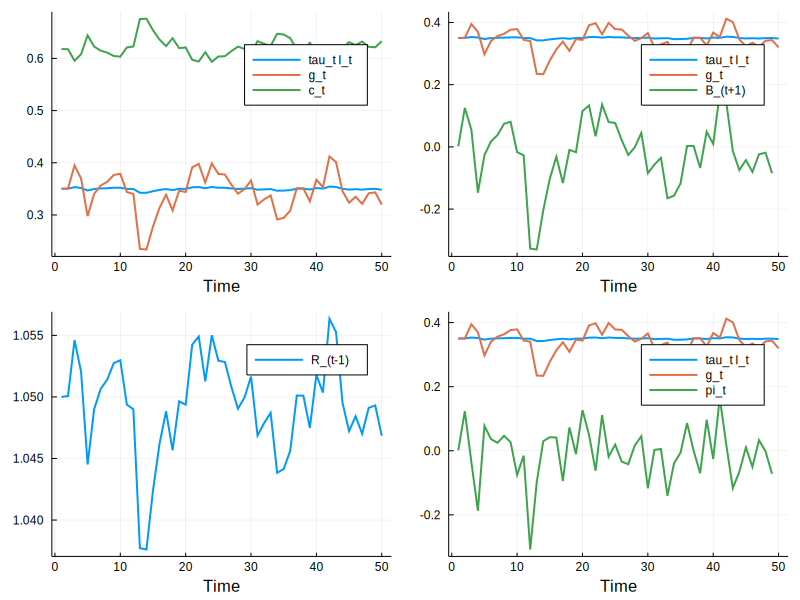

In [4]:
# para resultados reproduzíveis
using Random
Random.seed!(42)

# parâmetros
β = 1 / 1.05
ρ, mg = .7, .35
A = [ρ mg*(1 - ρ); 0.0 1.0]
C = [sqrt(1 - ρ^2) * mg / 10 0.0; 0 0]
Sg = [1.0 0.0]
Sd = [0.0 0.0]
Sb = [0 2.135]
Ss = [0.0 0.0]
proc = ContStochProcess(A, C)

econ = Economy(β, Sg, Sd, Sb, Ss, proc)
T = 50
path = compute_paths(econ, T)

gen_fig_1(path)

As legendas nas figuras indicam as variáveis que estão sendo rastreadas.

O mais óbvio da figura é a suavização de impostos, no sentido de que a receita tributária é
muito menos variável que as despesas do governo.

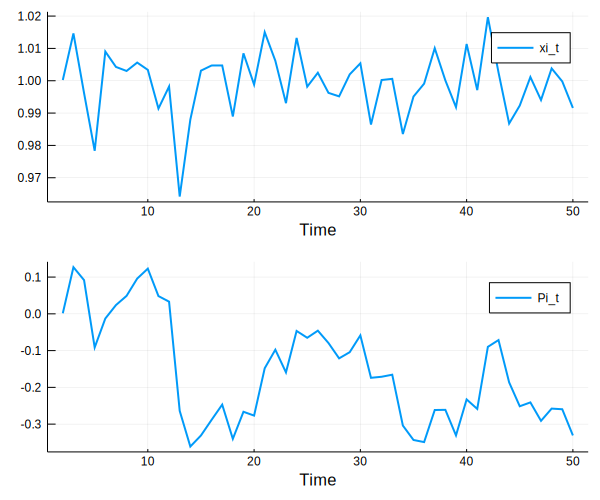

In [5]:
gen_fig_2(path)

Veja o <a href=/_static/pdfs/firenze.pdf download>manuscrito original</a> para comentários e manuscritos.

### O caso discreto

Nosso segundo exemplo adota uma especificação discreta de Markov para o processo exógeno:

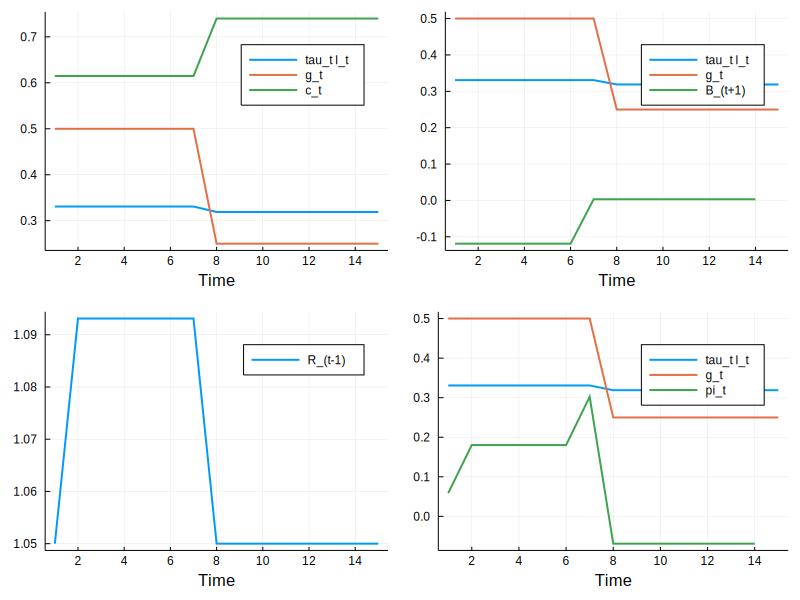

In [6]:
# Parâmetros
β = 1 / 1.05
P = [0.8 0.2 0.0
    0.0 0.5 0.5
    0.0 0.0 1.0]

# Possíveis estados do mundo
# Cada coluna é um estado do mundo. As linhas são [g d b s 1]
x_vals = [0.5 0.5 0.25;
        0.0 0.0  0.0;
        2.2 2.2  2.2;
        0.0 0.0  0.0;
        1.0 1.0  1.0]
Sg = [1.0 0.0 0.0 0.0 0.0]
Sd = [0.0 1.0 0.0 0.0 0.0]
Sb = [0.0 0.0 1.0 0.0 0.0]
Ss = [0.0 0.0 0.0 1.0 0.0]
proc = DiscreteStochProcess(P, x_vals)

econ = Economy(β, Sg, Sd, Sb, Ss, proc)
T = 15
path = compute_paths(econ, T)

gen_fig_1(path)

A chamada `gen_fig_2 (path)` gera

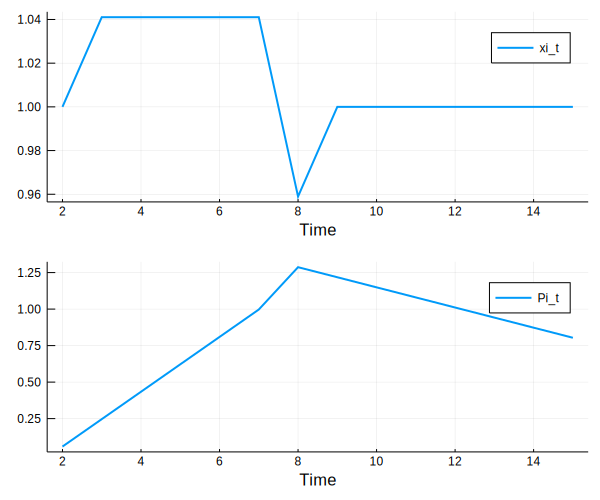

In [7]:
gen_fig_2(path)

Veja o <a href=/_static/pdfs/firenze.pdf download> manuscrito original </a> para comentários e interpretação

## Exercícios


<a id='lqramsey-ex1'></a>

### Exercício 1

Modifique o exemplo VAR [fornecido acima](#lq-cc), definindo

$$
g_{t+1} - \mu_g = \rho (g_{t-3} - \mu_g) + C_g w_{g, t+1}
$$

com $ \rho = 0.95 $ e $ C_g = 0.7 \sqrt{1 - \rho^2} $.

Produza os números correspondentes.

## Soluções

In [8]:
# parâmetros
β = 1 / 1.05
ρ, mg = .95, .35
A = [0. 0. 0. ρ  mg*(1-ρ);
     1. 0. 0. 0.       0.;
     0. 1. 0. 0.       0.;
     0. 0. 1. 0.       0.;
     0. 0. 0. 0.       1.]
C = zeros(5, 5)
C[1, 1] = sqrt(1 - ρ^2) * mg / 8
Sg = [1. 0. 0. 0. 0.]
Sd = [0. 0. 0. 0. 0.]
Sb = [0. 0. 0. 0. 2.135]
Ss = [0. 0. 0. 0. 0.]
proc = ContStochProcess(A, C)
econ = Economy(β, Sg, Sd, Sb, Ss, proc)

T = 50
path = compute_paths(econ, T)

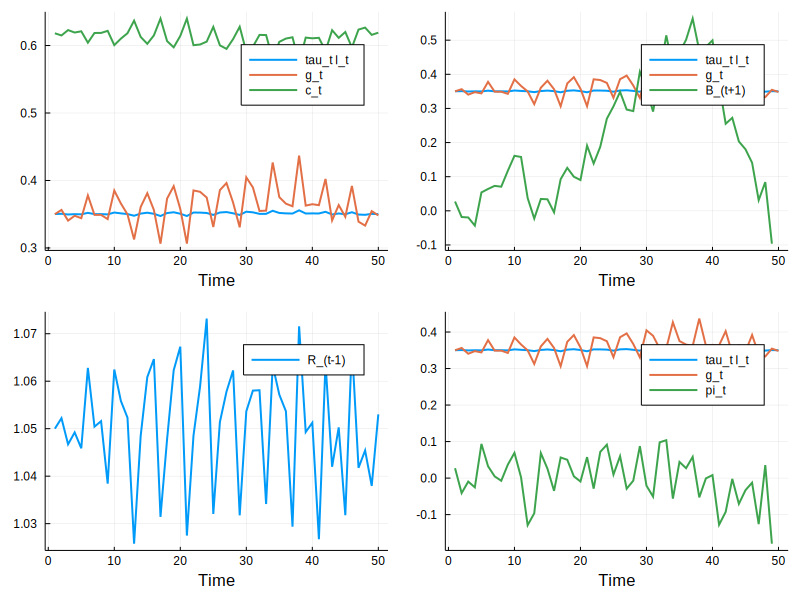

In [9]:
gen_fig_1(path)

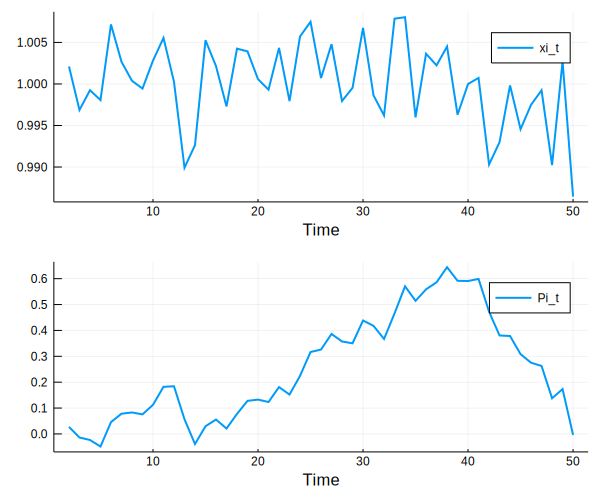

In [10]:
gen_fig_2(path)